In [1]:
import numpy as np
import pandas as pd
import glob, os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='OutputFiles/'

# list of parameters saved during the training of RNNs
par2save = ['layers', 'neurons', 'LR', 'dropout', 'act_fcn', 'epoch', 'kernel', 'stdDiagV', 'stdDiagT', \
            'fin_val_acc', 'best_val_acc', 'bestEpo', 'best_tst_acc']

os.chdir(path)

In [3]:
# get results from 128 trainings for each data representation, which are spread across several files
def getMergedResults(typeOf):
    baseDF = pd.DataFrame(columns=par2save)
    for file in glob.glob(typeOf): # 128 trials were split up to 8 independent threads, let's join the results
        fileData = pd.read_csv(path + file, delimiter=';')
        fileData = fileData.iloc[1:] # first row was filled up with 0s
        baseDF = baseDF.append(fileData)    
    return baseDF

In [4]:
dataRaw    = getMergedResults("*RAW.csv")
dataFeat   = getMergedResults("*F5feat.csv")
dataHLfeat = getMergedResults("*Fpcm.csv")

print(dataRaw.shape)
print(dataFeat.shape)
print(dataHLfeat.shape)

(128, 13)
(128, 13)
(128, 13)


### Display topologies and training results for top models
#### _raw_ data:

In [5]:
dataRaw.loc[dataRaw['best_val_acc'] > 0.964]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
4,4,23,0.006980,0.7,<function elu at 0x7ff5f5c69668>,160,Xavier,3.029701,2.844762,0.000000,0.968642,115,0.964692
13,5,20,0.005672,0.7,<function selu at 0x7ff5f07b1b18>,220,He,2.955546,2.876093,0.000000,0.967408,175,0.963951
9,4,24,0.002355,0.7,<function selu at 0x7f2c69c2bb18>,310,He,3.025271,2.824113,0.962716,0.966667,205,0.963951
11,1,97,0.002689,1.0,<function tanh at 0x7f2c6ef90488>,385,None,3.076428,2.386519,0.960988,0.966914,280,0.968889


#### _features_ data:

In [6]:
dataFeat.loc[dataFeat['best_val_acc'] > 0.957]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
1,1,65,0.004096,1.0,<function elu at 0x7f76b1a54668>,305,Xavier,2.733725,3.000584,0.000000,0.957778,255,0.953580
5,2,48,0.005117,0.7,<function softsign at 0x7fdec094bc80>,625,He,2.951418,2.903939,0.950617,0.958272,520,0.957531
1,1,78,0.004618,1.0,<function elu at 0x7f83435b5668>,300,None,2.798741,2.424032,0.949877,0.959506,195,0.960247


#### _HLfeatures_ data:

In [7]:
dataHLfeat.loc[dataHLfeat['best_val_acc'] > 0.936]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
6,3,32,0.003548,1.0,<function elu at 0x7f2e00133668>,350,None,3.802309,4.262675,0.926667,0.937531,245,0.933827
8,1,90,0.008640,1.0,<function softsign at 0x7f2e0015ac80>,150,Xavier,4.166626,4.409050,0.918519,0.936296,75,0.933580
6,1,91,0.004312,1.0,<function tanh at 0x7ff763d0a488>,345,He,4.612991,4.359686,0.605185,0.936543,240,0.929630
3,3,33,0.007130,0.7,<function elu at 0x7fe894e62668>,260,None,4.565031,4.881526,0.000000,0.937778,200,0.931358
10,1,60,0.010896,1.0,<function softsign at 0x7ff04854ac80>,265,None,4.026130,4.382003,0.000000,0.936543,160,0.936050


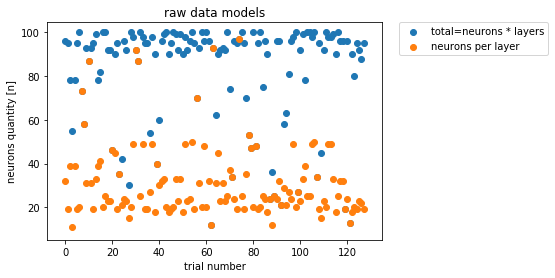

In [8]:
xr = range(0,dataRaw.shape[0])
plot1=plt.scatter(xr, dataRaw['neurons']*dataRaw['layers'], label='total=neurons * layers')
plot1=plt.scatter(xr, dataRaw['neurons'], label='neurons per layer')
plot1=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot1=plt.xlabel('trial number')
plot1=plt.ylabel('neurons quantity [n]')
plot1=plt.title('raw data models')

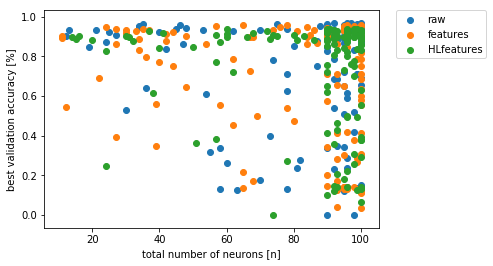

In [9]:
plot2=plt.scatter(dataRaw['neurons']*dataRaw['layers'],dataRaw['best_val_acc'], label='raw')
plot2=plt.scatter(dataFeat['neurons']*dataFeat['layers'],dataFeat['best_val_acc'], label='features')
plot2=plt.scatter(dataHLfeat['neurons']*dataHLfeat['layers'],dataHLfeat['best_val_acc'], label='HLfeatures')
plot2=plt.xlabel('total number of neurons [n]')
plot2=plt.ylabel('best validation accuracy [%]')
plot2=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

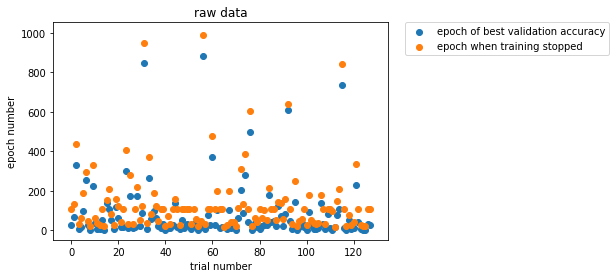

In [10]:
plot3=plt.scatter(xr, dataRaw['bestEpo'], label='epoch of best validation accuracy')
plot3=plt.scatter(xr, dataRaw['epoch'], label='epoch when training stopped')
plot3=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot3=plt.xlabel('trial number')
plot3=plt.ylabel('epoch number')
plot3=plt.title('raw data')

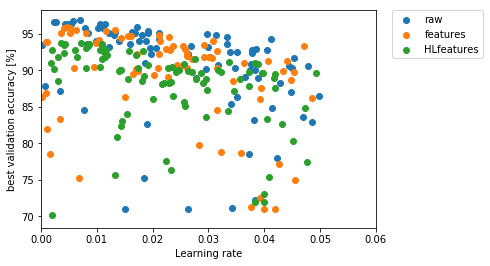

In [11]:
plot4=plt.scatter(dataRaw['LR'].loc[dataRaw['best_val_acc']>0.7],100*dataRaw['best_val_acc'].loc[dataRaw['best_val_acc']>0.7], label='raw')
plot4=plt.scatter(dataFeat['LR'].loc[dataFeat['best_val_acc']>0.7],100*dataFeat['best_val_acc'].loc[dataFeat['best_val_acc']>0.7], label='features')
plot4=plt.scatter(dataHLfeat['LR'].loc[dataHLfeat['best_val_acc']>0.7],100*dataHLfeat['best_val_acc'].loc[dataHLfeat['best_val_acc']>0.7], label='HLfeatures')
plot4=plt.xlabel('Learning rate')
plot4=plt.ylabel('best validation accuracy [%]')
plot4=plt.xlim(0, 0.06)
plot3=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
#helper function for generating cummulative plots
def getCumulatedPlot(myData,trials):
    resolution=200
    h=np.histogram(myData,bins=resolution, range=[0.0,1.0])
    h=h[0]
    c=np.cumsum(h)/trials
    tmpx = np.linspace(0,trials,num=resolution)/trials
    firstOne = np.argmax(c)+1
    c=c[0:firstOne]
    tmpx=tmpx[0:firstOne]
    
    return c, tmpx

In [13]:
c1,tmpx1 = getCumulatedPlot(dataRaw['best_val_acc'],   trials=128)
c2,tmpx2 = getCumulatedPlot(dataFeat['best_val_acc'],  trials=128)
c3,tmpx3 = getCumulatedPlot(dataHLfeat['best_val_acc'],trials=128)

(0, 100)

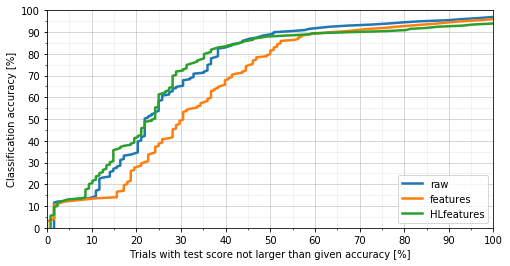

In [14]:
plt.figure(figsize=(8,4))
plt.plot(c1*100,100*tmpx1, label='raw', linewidth=2.5)
plt.plot(c2*100,100*tmpx2, label='features', linewidth=2.5)
plt.plot(c3*100,100*tmpx3, label='HLfeatures', linewidth=2.5)

plt.ylabel('Classification accuracy [%]')
plt.xlabel('Trials with test score not larger than given accuracy [%]')

axes = plt.gca()
plt.grid()
plt.legend(loc=4)

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)                                               

axes.set_xticks(major_ticks)                                                       
axes.set_xticks(minor_ticks, minor=True)                                           
axes.set_yticks(major_ticks)                                                       
axes.set_yticks(minor_ticks, minor=True)

axes.grid(which='both')                                                            
                           
axes.grid(which='minor', alpha=0.2)                                                
axes.grid(which='major', alpha=0.5) 
axes.set_ylim([0,100])
axes.set_xlim([0,100])


#plt.savefig('cumulatedPlot.png',dpi=600)

In [15]:
#statistics of top 4 models from first # trials -> # iterates through 'limits'
limits = [4,8,16,32,64,128]
def top4(dataType):    
    boxplt=[]
    print('-----------------------')
    for my_range in limits:
        _range = dataType['best_tst_acc'][0:my_range]
        _range = np.sort(_range)        
        _range = _range[-4:]*100 #top 4    
        print('|{:.3f}\t|{:.3f}\t|{:.3f}|'.format(max(_range),np.mean(_range),np.std(_range)))            
        boxplt.append(_range)    
    return boxplt

In [16]:
print(' max[%]\tmean[%]\tstd[%]')
bp1 = top4(dataRaw)
bp2 = top4(dataFeat)
bp3 = top4(dataHLfeat)

 max[%]	mean[%]	std[%]
-----------------------
|95.333	|78.451	|27.140|
|95.333	|92.315	|3.295|
|95.333	|92.315	|3.295|
|96.469	|96.315	|0.184|
|96.469	|96.315	|0.184|
|96.889	|96.617	|0.197|
-----------------------
|95.358	|81.049	|13.922|
|95.506	|94.549	|0.892|
|95.506	|95.068	|0.371|
|95.753	|95.531	|0.142|
|95.753	|95.531	|0.142|
|96.025	|95.698	|0.214|
-----------------------
|91.827	|64.432	|26.448|
|91.827	|90.685	|1.142|
|91.827	|91.222	|0.759|
|93.383	|92.994	|0.502|
|93.383	|92.994	|0.502|
|93.605	|93.414	|0.114|


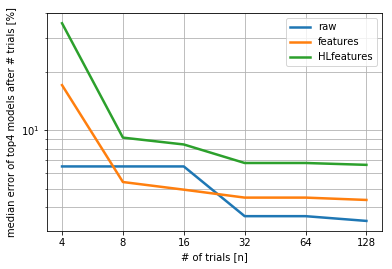

In [17]:
errors1 = 100 -np.median(bp1,axis=1)
errors2 = 100 -np.median(bp2,axis=1)
errors3 = 100 -np.median(bp3,axis=1)

plot5=plt.semilogy(range(1,7),errors1, linewidth=2.5, label='raw')
plot5=plt.semilogy(range(1,7),errors2, linewidth=2.5, label='features')
plot5=plt.semilogy(range(1,7),errors3, linewidth=2.5, label='HLfeatures')
plot5=plt.xticks(range(1,7),limits)
plot5=plt.ylabel('median error of top4 models after # trials [%]')
plot5=plt.xlabel('# of trials [n]')
plot5=plt.grid(True, which='both')
plot5=plt.legend(loc=1)

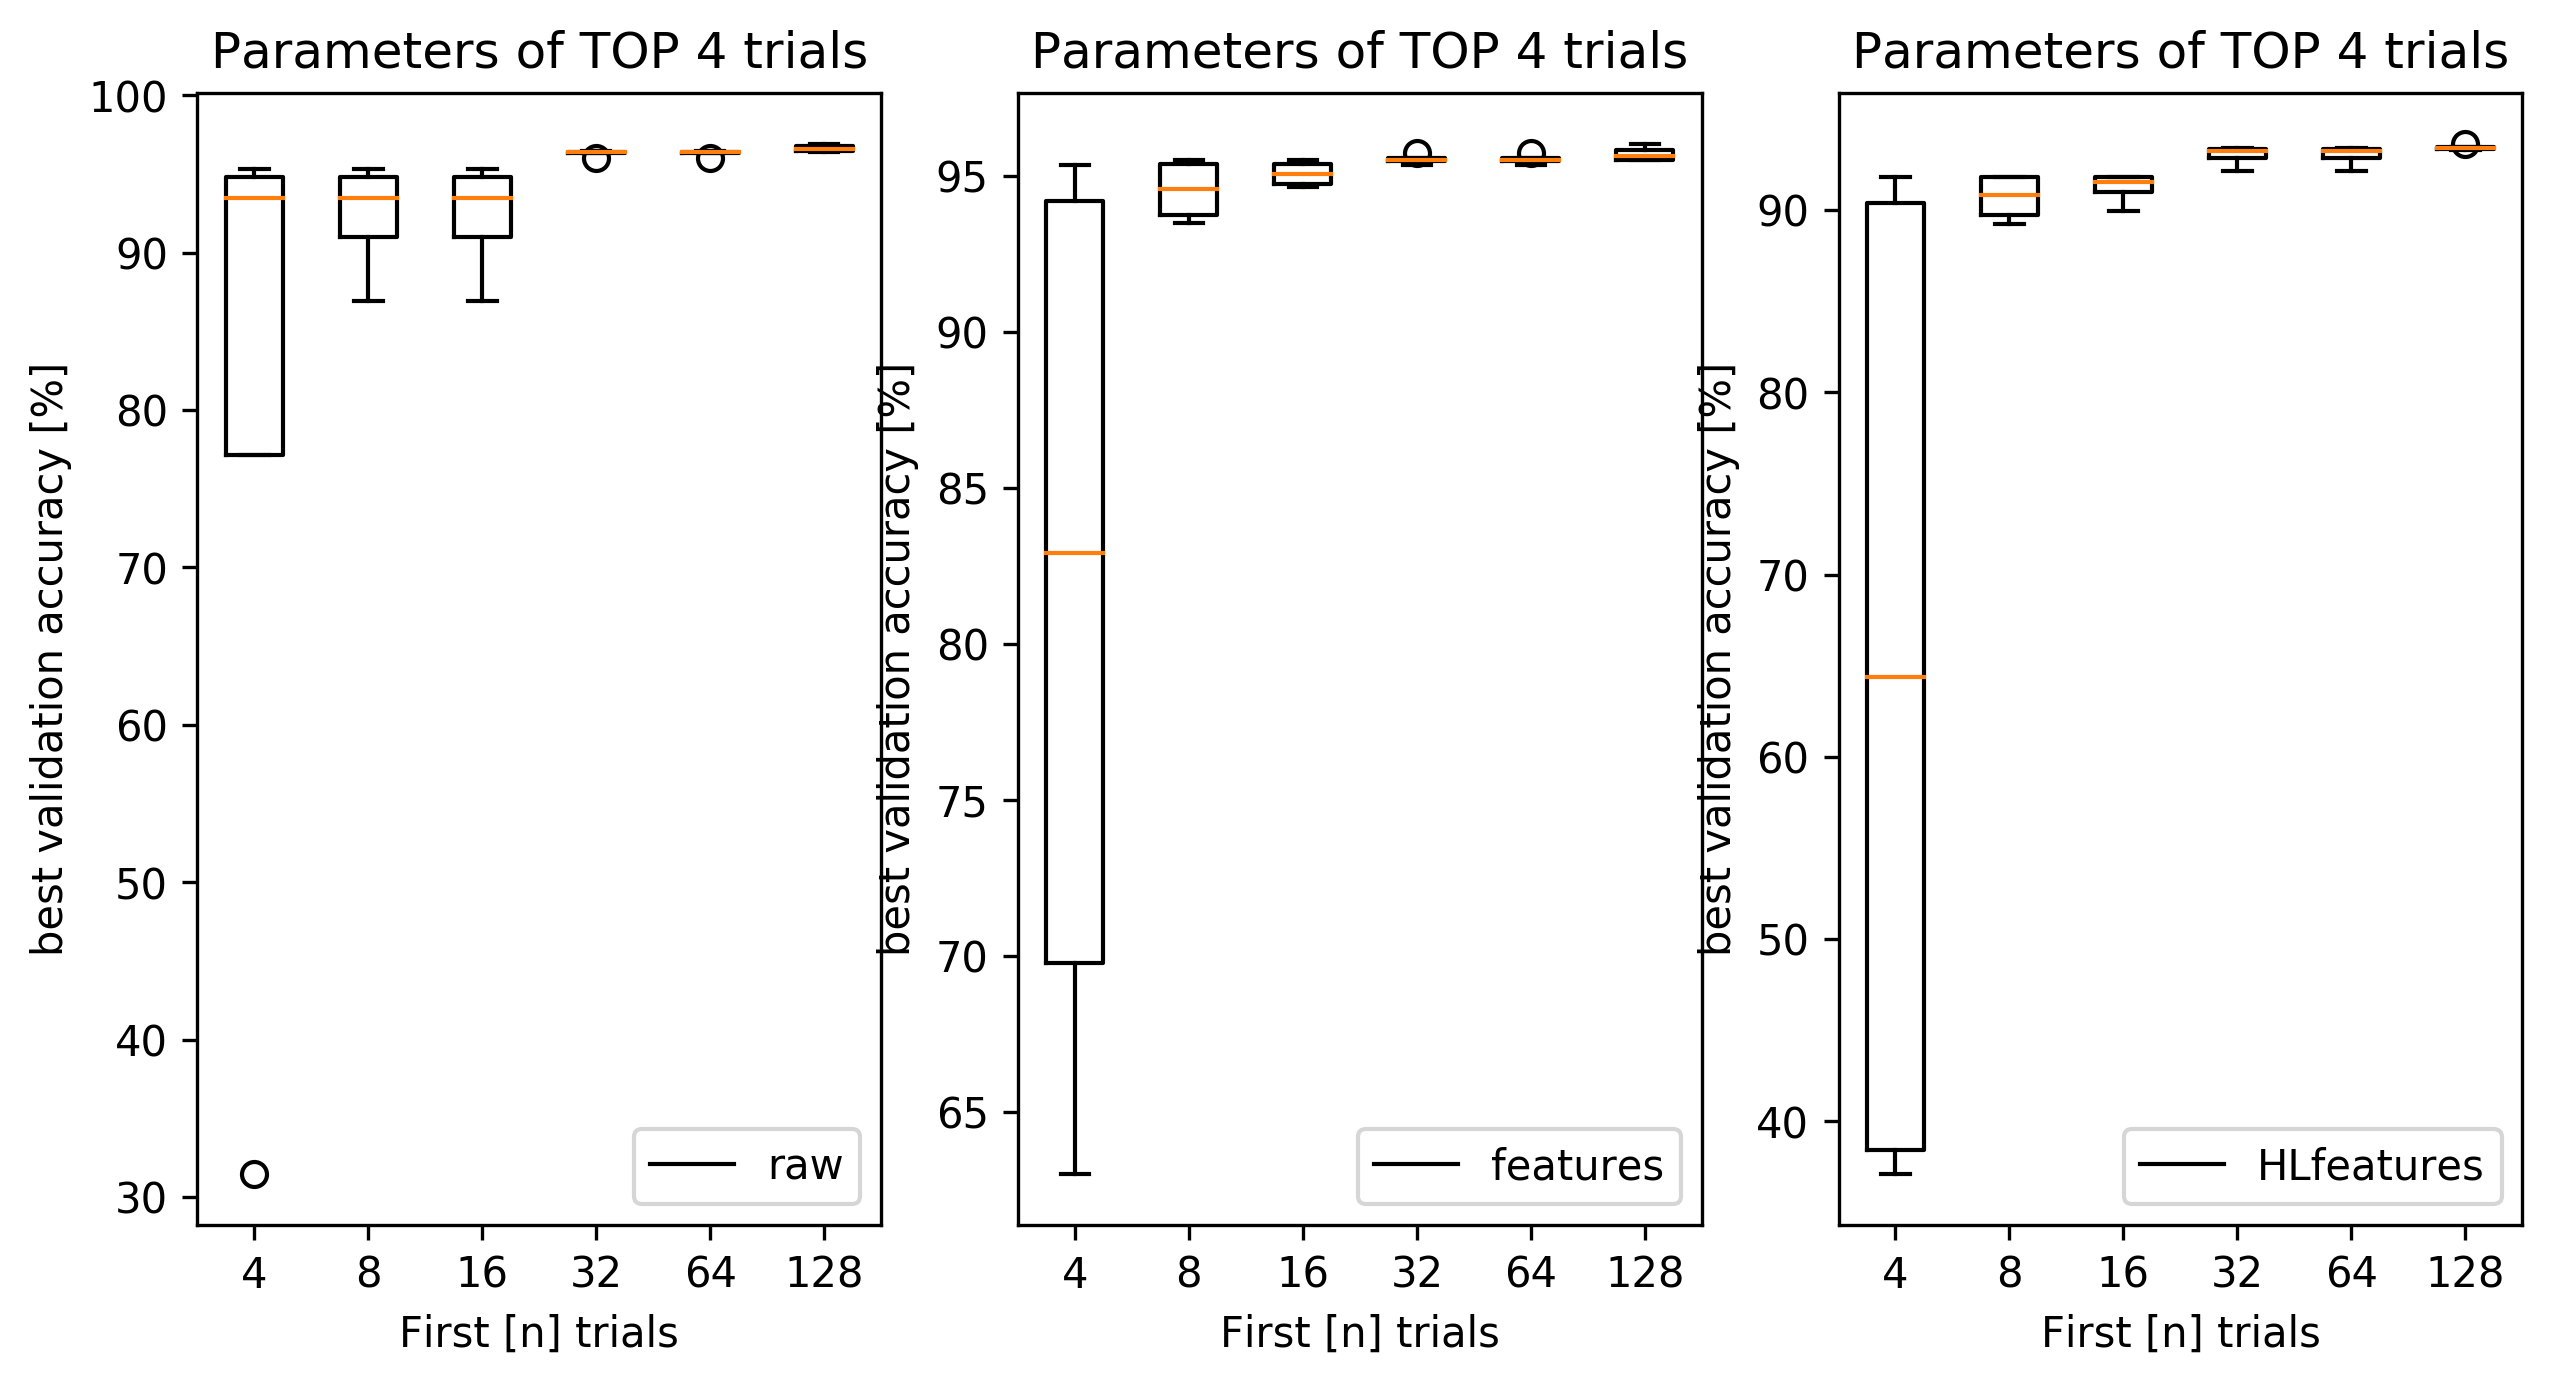

In [18]:
plot6=plt.figure(figsize=(10,5), dpi=300)
plot6=plt.subplot(131)
plot6=plt.boxplot(bp1)
plot6=plt.xlabel('First [n] trials')
plot6=plt.ylabel('best validation accuracy [%]')
plot6=plt.title('Parameters of TOP 4 trials')
plot6=plt.xticks(range(1,7),limits)
plot6=plt.legend(['raw'])

plot6=plt.subplot(132)
plot6=plt.boxplot(bp2)
plot6=plt.xlabel('First [n] trials')
plot6=plt.ylabel('best validation accuracy [%]')
plot6=plt.title('Parameters of TOP 4 trials')
plot6=plt.xticks(range(1,7),limits)
plot6=plt.legend(['features'])

plot6=plt.subplot(133)
plot6=plt.boxplot(bp3)
plot6=plt.xlabel('First [n] trials')
plot6=plt.ylabel('best validation accuracy [%]')
plot6=plt.title('Parameters of TOP 4 trials')
plot6=plt.xticks(range(1,7),limits)
plot6=plt.legend(['HLfeatures'])

In [19]:
_range_temp = dataRaw['best_tst_acc'].as_matrix()  
t2 = np.split(_range_temp,8)   
print(np.max(t2,axis=1))

[0.953333 0.964692 0.953087 0.957531 0.968889 0.961235 0.961729 0.967161]


In [20]:
limits2 = [1,2,4,8,16,32,64]
boxplt2=[]

for my_range in limits:
    _range2 = dataRaw['best_tst_acc'].as_matrix()      
    set_size = 128/my_range    
    t2 = np.split(_range2,set_size)        
    topres = np.max(t2,axis=1)                    
    boxplt2.append(topres)

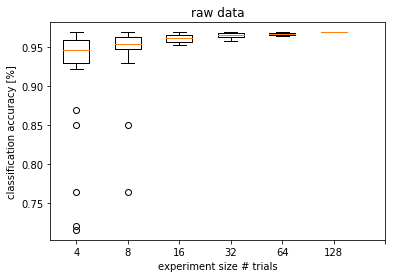

In [21]:
plot7=plt.boxplot(boxplt2)
plot7=plt.xlabel('experiment size # trials')
plot7=plt.ylabel('classification accuracy [%]')
plot7=plt.title('raw data')
plot7=plt.xticks(range(1,8),limits)

In [22]:
#how many deep models (with number of layers >2) are there in top 10 models for each data representation?
print('Deep models (layers>2) in top10: ')

oraw = dataRaw.loc[dataRaw['best_val_acc'] > 0.959]
ooraw = oraw.loc[oraw['layers']>2]
print('raw: \t\t', ooraw.shape[0] ,'/', oraw.shape[0])

ofea = dataFeat.loc[dataFeat['best_val_acc'] > 0.948]
oofea = ofea.loc[ofea['layers']>2]
print('features: \t', oofea.shape[0] ,'/', ofea.shape[0])

ohlf = dataHLfeat.loc[dataHLfeat['best_val_acc'] > 0.9282]
oohlf = ohlf.loc[ohlf['layers']>2]
print('HLfeatures: \t', oohlf.shape[0] ,'/', ohlf.shape[0])

Deep models (layers>2) in top10: 
raw: 		 7 / 10
features: 	 3 / 10
HLfeatures: 	 5 / 10


In [23]:
def getSTDofTOP3(my_data):
    temp=np.sort(my_data)
    return np.std(temp[-3:]*100)

In [24]:
print('Standard deviation of classificaiton accuracy of top 3 models for each data representation:')
print("raw \t\tstd: {0:.4f}%".format( getSTDofTOP3(dataRaw['best_val_acc'])))
print("features \tstd: {0:.4f}%".format( getSTDofTOP3(dataFeat['best_val_acc'])))
print("HLfeatures \tstd: {0:.4f}%".format( getSTDofTOP3(dataHLfeat['best_val_acc'])))

Standard deviation of classificaiton accuracy of top 3 models for each data representation:
raw 		std: 0.0727%
features 	std: 0.0727%
HLfeatures 	std: 0.0534%


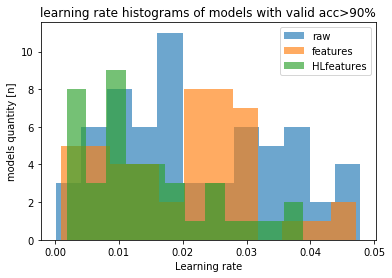

In [25]:
bestLR1 = dataRaw['LR'].loc[dataRaw['best_val_acc']> 0.9]
bestLR2 = dataFeat['LR'].loc[dataFeat['best_val_acc']> 0.9]
bestLR3 = dataHLfeat['LR'].loc[dataHLfeat['best_val_acc']> 0.9]

mybins = 12
plot8=plt.hist(bestLR1, alpha=0.65, bins=mybins, label='raw')
plot8=plt.hist(bestLR2, alpha=0.65, bins=mybins, label='features')
plot8=plt.hist(bestLR3, alpha=0.65, bins=mybins, label='HLfeatures')
plot8=plt.legend(loc=1)

plot8=plt.ylabel('models quantity [n]')
plot8=plt.xlabel('Learning rate')
plot8=plt.title('learning rate histograms of models with valid acc>90%')

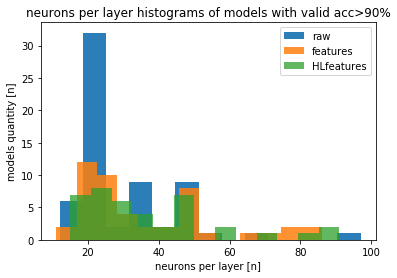

In [26]:
n1 = dataRaw['neurons'].loc[dataRaw['best_val_acc']> 0.9]
n2 = dataFeat['neurons'].loc[dataFeat['best_val_acc']> 0.9]
n3 = dataHLfeat['neurons'].loc[dataHLfeat['best_val_acc']> 0.9]

plot9=plt.hist(n1, alpha=0.95, bins=13, label='raw')
plot9=plt.hist(n2, alpha=0.85, bins=13, label='features')
plot9=plt.hist(n3, alpha=0.75, bins=13, label='HLfeatures')

plot8=plt.ylabel('models quantity [n]')
plot8=plt.xlabel('neurons per layer [n]')
plot9=plt.title('neurons per layer histograms of models with valid acc>90%')
plot9=plt.legend()

In [27]:
def getDropoutScatter(baseDF,plotname):    
    plt.figure(figsize=(6,4))
    plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 1.0],baseDF['best_val_acc'].loc[baseDF['dropout'] == 1.0],label='1.0')
    plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 0.7],baseDF['best_val_acc'].loc[baseDF['dropout'] == 0.7],label='0.7')
    plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 0.5],baseDF['best_val_acc'].loc[baseDF['dropout'] == 0.5],label='0.5')
    plt.legend()
    plt.ylim(0.8,1)
    plt.xlim(0,0.06)
    plt.ylabel('best validation accuracy [%]')
    plt.xlabel('learning rate')
    plt.title('Dropout for '+plotname)
    plt.grid(True)    

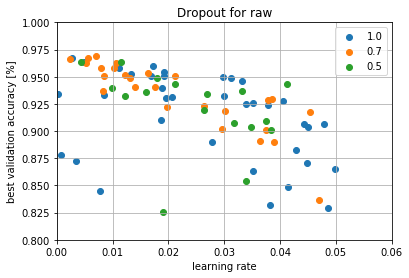

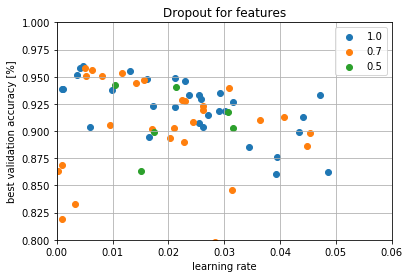

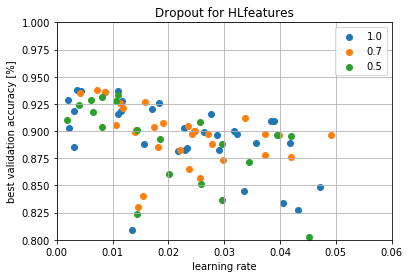

In [28]:
getDropoutScatter(dataRaw,'raw')
getDropoutScatter(dataFeat,'features')
getDropoutScatter(dataHLfeat,'HLfeatures')

In [29]:
def getHowManyNeuronsScatter(baseDF, plotname, threshold):   
    plt.figure(figsize=(6,4))
    plt.scatter(baseDF['LR'].loc[baseDF['neurons']*baseDF['layers'] > threshold],\
           baseDF['best_val_acc'].loc[baseDF['neurons']*baseDF['layers'] > threshold],label='more')
    plt.scatter(baseDF['LR'].loc[baseDF['neurons']*baseDF['layers'] <= threshold],\
           baseDF['best_val_acc'].loc[baseDF['neurons']*baseDF['layers'] <= threshold],label='less')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(0,0.06)
    plt.ylabel('best validation accuracy [%]')
    plt.xlabel('learning rate')    
    plt.title(plotname+ ': Total number of neurons in relation to threshold: '+str(threshold))
    plt.grid(True)

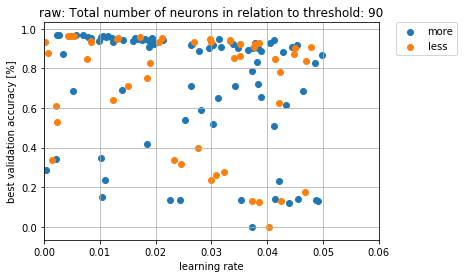

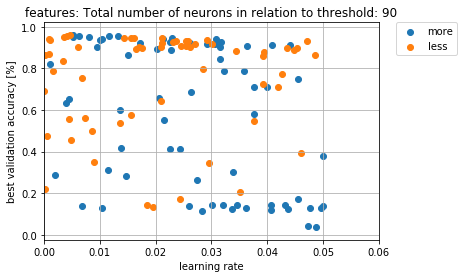

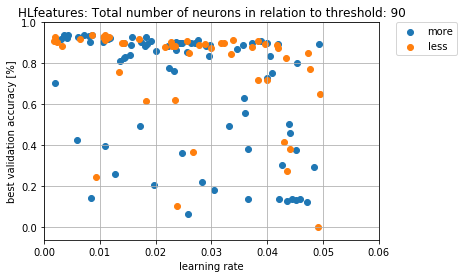

In [30]:
my_threshold = 90
getHowManyNeuronsScatter(dataRaw,'raw',my_threshold)
getHowManyNeuronsScatter(dataFeat,'features',my_threshold)
getHowManyNeuronsScatter(dataHLfeat,'HLfeatures',my_threshold)